<h1 style='text-align:center;font-weight:bold;color:white'> Married Women Labor Force Participation Analysis</h1>

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Mroz.csv"
df = pd.read_csv(url)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  753 non-null    int64  
 1   lfp       753 non-null    object 
 2   k5        753 non-null    int64  
 3   k618      753 non-null    int64  
 4   age       753 non-null    int64  
 5   wc        753 non-null    object 
 6   hc        753 non-null    object 
 7   lwg       753 non-null    float64
 8   inc       753 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 53.1+ KB


In [88]:
df.describe()

,rownames,k5,k618,age,lwg,inc
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,377.000000,0.237716,1.353254,42.537849,1.097115,20.128965
std,217.516666,0.523959,1.319874,8.072574,0.587556,11.634799
min,1.000000,0.000000,0.000000,30.000000,-2.054124,-0.029000
25%,189.000000,0.000000,0.000000,36.000000,0.818087,13.025000
50%,377.000000,0.000000,1.000000,43.000000,1.068403,17.700001
75%,565.000000,0.000000,2.000000,49.000000,1.399717,24.466000
max,753.000000,3.000000,8.000000,60.000000,3.218876,96.000000


In [89]:
df.describe(include='object')

,lfp,wc,hc
count,753,753,753
unique,2,2,2
top,yes,no,no
freq,428,541,458


In [90]:
# Data Preprocessing
df['lfp_binary'] = df['lfp'].map({'yes': 1, 'no': 0})
df['wc_binary'] = df['wc'].map({'yes': 1, 'no': 0})
df['hc_binary'] = df['hc'].map({'yes': 1, 'no': 0})

In [91]:
df[['lfp_binary', 'k5', 'k618', 'age', 'wc_binary', 'hc_binary', 'lwg', 'inc']].describe()

,lfp_binary,k5,k618,age,wc_binary,hc_binary,lwg,inc
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.568393,0.237716,1.353254,42.537849,0.281541,0.391766,1.097115,20.128965
std,0.495630,0.523959,1.319874,8.072574,0.450049,0.488469,0.587556,11.634799
min,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,-2.054124,-0.029000
25%,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.818087,13.025000
50%,1.000000,0.000000,1.000000,43.000000,0.000000,0.000000,1.068403,17.700001
75%,1.000000,0.000000,2.000000,49.000000,1.000000,1.000000,1.399717,24.466000
max,1.000000,3.000000,8.000000,60.000000,1.000000,1.000000,3.218876,96.000000


In [92]:
# Prepare data for logistic regression
X = df[['k5', 'k618', 'age', 'wc_binary', 'hc_binary', 'lwg', 'inc']]
X = sm.add_constant(X)
y = df['lfp_binary']

In [93]:
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


In [94]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:             lfp_binary   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.1209
Time:                        20:02:57   Log-Likelihood:                -452.63
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 8.923e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1821      0.644      4.938      0.000       1.919       4.445
k5            -1.4629      0.197     -7.426      0.000      -1.849      -1.077
k618          -0.0646      0.068     -0.950      0.3

In [95]:
# Calculate predicted probabilities
df['lfp_prob'] = logit_model.predict(X)

# Create classification table
df['predicted_lfp'] = (df['lfp_prob'] >= 0.5).astype(int)

In [96]:
classification_table = pd.crosstab(df['lfp_binary'], df['predicted_lfp'], rownames=['Actual'], colnames=['Predicted'])
classification_table

Predicted,0,1
Actual,,
0,180,145
1,86,342


In [97]:
# Marginal effects
marginal_effects = logit_model.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:             lfp_binary
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
k5            -0.3037      0.035     -8.633      0.000      -0.373      -0.235
k618          -0.0134      0.014     -0.951      0.341      -0.041       0.014
age           -0.0131      0.002     -5.224      0.000      -0.018      -0.008
wc_binary      0.1676      0.046      3.614      0.000       0.077       0.258
hc_binary      0.0232      0.043      0.543      0.587      -0.061       0.107
lwg            0.1255      0.030      4.171      0.000       0.067       0.185
inc           -0.0072      0.002     -4.381      0.000      -0.010      -0.004


In [109]:
# Odds ratios
odds_ratios = np.exp(logit_model.params)
pd.DataFrame(odds_ratios)

,0
const,24.098280
k5,0.231561
k618,0.937470
age,0.939065
wc_binary,2.241788
hc_binary,1.118215
lwg,1.830690
inc,0.966140


In [110]:
# Multicollinearity check
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame(vif_data)

,Variable,VIF
0,const,57.693152
1,k5,1.263074
2,k618,1.212232
3,age,1.497939
4,wc_binary,1.518339
5,hc_binary,1.540656
6,lwg,1.123176
7,inc,1.192132


# **Visualizations**

## Age vs Probability of Labor Force Participation

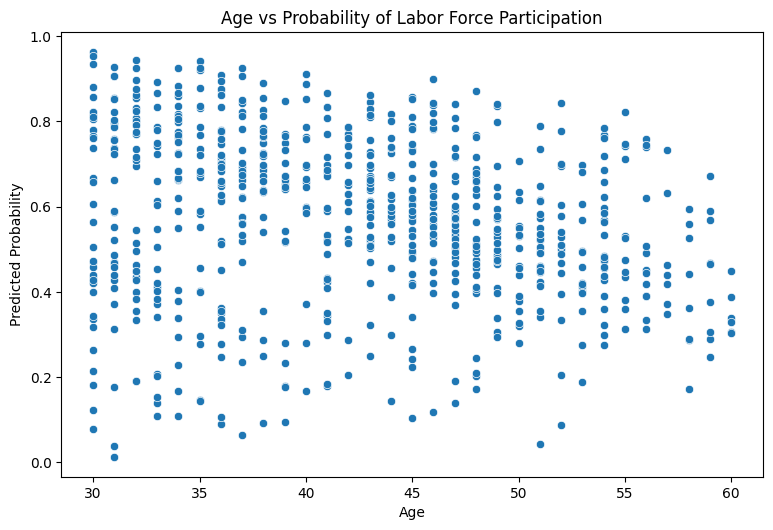

In [100]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.scatterplot(x='age', y='lfp_prob', data=df)
plt.title('Age vs Probability of Labor Force Participation')
plt.xlabel('Age')
plt.ylabel('Predicted Probability')
plt.tight_layout()
plt.show()

## Number of Young Children vs Probability of Labor Force Participation

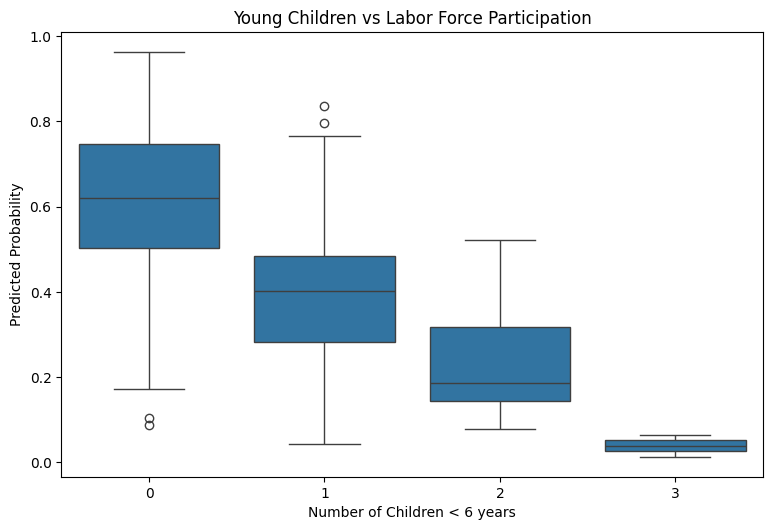

In [101]:
plt.figure(figsize=(15,10))
plt.subplot(222)
sns.boxplot(x='k5', y='lfp_prob', data=df)
plt.title('Young Children vs Labor Force Participation')
plt.xlabel('Number of Children < 6 years')
plt.ylabel('Predicted Probability')
plt.tight_layout()
plt.show()

## Wife's Education vs Probability of Labor Force Participation

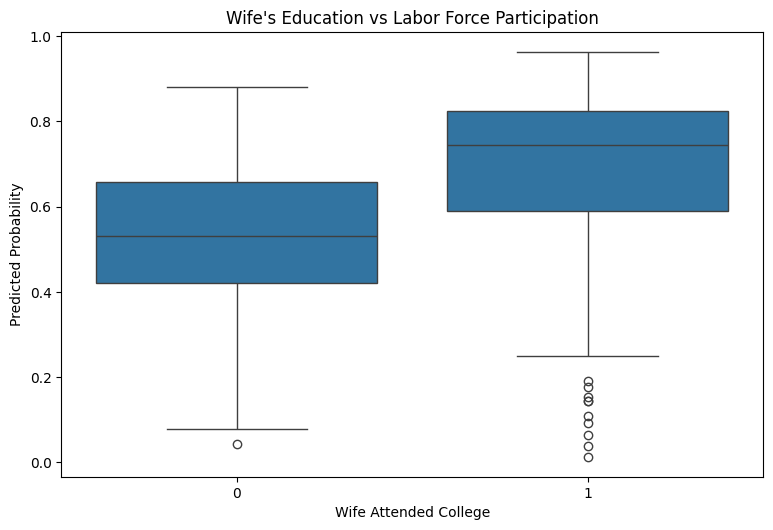

In [102]:
plt.figure(figsize=(15,10))
plt.subplot(223)
sns.boxplot(x='wc_binary', y='lfp_prob', data=df)
plt.title("Wife's Education vs Labor Force Participation")
plt.xlabel('Wife Attended College')
plt.ylabel('Predicted Probability')
plt.tight_layout()
plt.show()

## Log Expected Wage vs Probability of Labor Force Participation

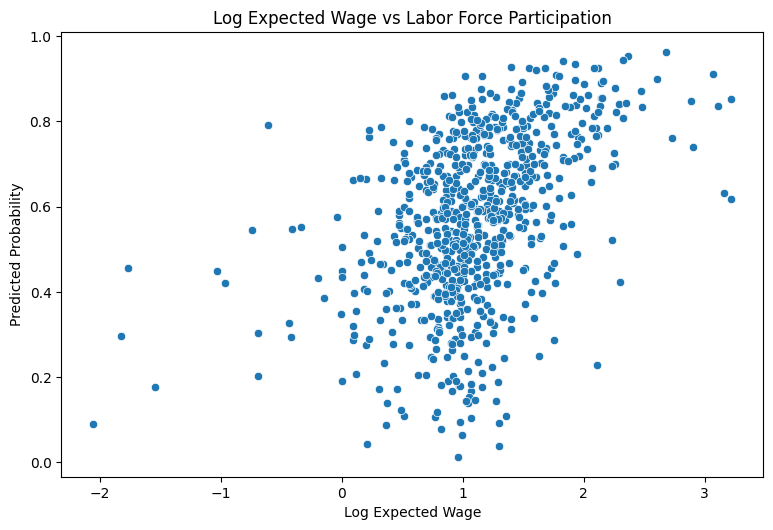

In [103]:
plt.figure(figsize=(15, 10))
plt.subplot(224)
sns.scatterplot(x='lwg', y='lfp_prob', data=df)
plt.title('Log Expected Wage vs Labor Force Participation')
plt.xlabel('Log Expected Wage')
plt.ylabel('Predicted Probability')
plt.tight_layout()
plt.show()